In [7]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math
from random import randint


NUM_OF_COORDS=50
coords = [(randint(1,NUM_OF_COORDS),randint(1,NUM_OF_COORDS)) for i in range(1,NUM_OF_COORDS)]
edges= list(set(coords))
random_start = np.random.rand(100)
starting_state = np.where(random_start>0.5, 1, 0)

fitness = mlrose.MaxKColor(edges)
problem_fit = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)

def get_data(algorithm, run_times, **args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()      
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, max_attempts=100, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

def by_max_n(algorithm, run_times, max_ns, **args):
    fit = []
    dur = []
    for i in max_ns:
        _fit, _dur = get_data(algorithm, run_times, N=i, max_iters=500, max_attempts=10, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

max_iters=range(0,6000,1000)
max_ns=range(25,250,25)
run_times=1


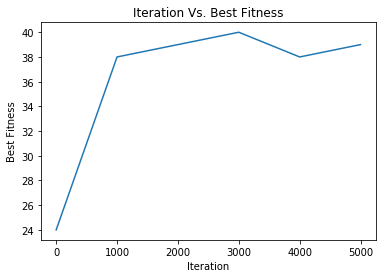

In [3]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [ ]:
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

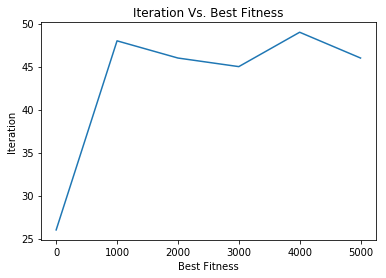

In [8]:
schedule = mlrose.ExpDecay()

fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters, schedule = schedule)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [9]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=max_iters)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)


In [ ]:
fit_ga, dur_ga = by_max_n(mlrose.genetic_alg, run_times, max_ns)
plt.xlabel('N Count')
plt.ylabel('Best Fitness')
plt.plot(max_ns, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()



In [ ]:
schedule = mlrose.ExpDecay()

fit_sa, dur_sa = by_max_n(mlrose.simulated_annealing, run_times, max_ns, schedule = schedule)
plt.xlabel('N Count')
plt.ylabel('Best Fitness')
plt.plot(max_ns, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [ ]:
fit_mi, dur_mi = by_max_n(mlrose.mimic, run_times, max_ns)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_ns, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [ ]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=max_ns)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=max_ns)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)